# NLP with RNN - Toxic Comment Classification

# 1. Downloading the data

In [1]:
!pip install Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [3]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 99% 52.0M/52.6M [00:03<00:00, 24.7MB/s]
100% 52.6M/52.6M [00:03<00:00, 17.0MB/s]


In [4]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [6]:
import pandas as pd
raw_df = pd.read_csv('data/train.csv.zip')
test_df = pd.read_csv('data/test.csv.zip')
sub_df = pd.read_csv('data/sample_submission.csv.zip')

In [7]:
raw_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
raw_df.sample(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
81759,daaafa035af866cb,"""\n\n Islamophobic material \n\nA cursory exam...",0,0,0,0,0,0
127181,a830194f0788a369,The economics section is woefully pessimistic....,0,0,0,0,0,0
69269,b953474dd2bffcef,To the humongous faggot pro-russian administra...,1,0,1,0,1,0
28942,4cb12a2b93c41d98,3RR\nYou have also broken the spirit of 3RR an...,0,0,0,0,0,0
481,01402c8ac88fa9de,"""\n\n Can there be a more concise listing? \n\...",0,0,0,0,0,0
50412,86c97c18365ffe39,Vandalism \n\nThank you for experimenting with...,0,0,0,0,0,0
124481,99eced3c8fb8228b,and once again for Manfred: here you go and se...,0,0,0,0,0,0
9904,1a3a284aa65c156b,"""====Regarding edits made during May 28 2006 (...",0,0,0,0,0,0
150160,679282ea40b91b60,"""===August 2007===\n\nA tag has been placed on...",0,0,0,0,0,0
8854,177f4ee21bd0e4b0,that ist the evidence that something is wrong ...,0,0,0,0,0,0


In [11]:
raw_df.comment_text.values[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [12]:
target_cols = ['toxic',	'severe_toxic',	'obscene'	,'threat'	,'insult',	'identity_hate']

In [14]:
for col in target_cols:
  print(col)
  print(raw_df[col].value_counts(normalize=True))

toxic
0    0.904156
1    0.095844
Name: toxic, dtype: float64
severe_toxic
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
obscene
0    0.947052
1    0.052948
Name: obscene, dtype: float64
threat
0    0.997004
1    0.002996
Name: threat, dtype: float64
insult
0    0.950636
1    0.049364
Name: insult, dtype: float64
identity_hate
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [15]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [16]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


# 2. Preparing the data for training

- Create vocabulary using TorchText
- Create training and validation sets
- Create PyTorch Dataloaders

### Create a Vocabulary

The tokenizer does the job same as a normal tokenize function as we defined in the earlier notebooks

In [17]:
from torchtext.data.utils import get_tokenizer

In [18]:
tokenizer = get_tokenizer('basic_english')

In [21]:
sample_comment = raw_df.comment_text.values[0]
sample_comment

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [22]:
sample_comment_tokens = tokenizer(sample_comment)
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

Vocabulary is also present in torchtext.vocab

In [23]:
from torchtext.vocab import build_vocab_from_iterator

In [36]:
VOCAB_SIZE = 2000
comment_tokens = raw_df.comment_text.map(tokenizer)
comment_tokens

0         [explanation, why, the, edits, made, under, my...
1         [d, ', aww, !, he, matches, this, background, ...
2         [hey, man, ,, i, ', m, really, not, trying, to...
3         [more, i, can, ', t, make, any, real, suggesti...
4         [you, ,, sir, ,, are, my, hero, ., any, chance...
                                ...                        
159566    [and, for, the, second, time, of, asking, ,, w...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, ,, theres, no, actual, article,...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, ., ., ., i, really, don, ', t, think, yo...
Name: comment_text, Length: 159571, dtype: object

In [37]:
unk_token = '<unk>' # Used to represent words not present in the vocabulary
pad_token = '<pad>' # Used to trim the longer sentences into shorter since RNN requires input sentences of same size

In [38]:
vocab = build_vocab_from_iterator(comment_tokens,specials=[unk_token,pad_token],max_tokens = VOCAB_SIZE)

Vocab assign a number of every word

In [39]:
vocab['this']

18

This error is due to the fact that the vocabulary does not contains the word "hardcore" due to the smaller vocabulary size

In [40]:
vocab.set_default_index(vocab[unk_token])

In [41]:
vocab['harcore']

0

In [46]:
sample_indices = vocab.lookup_indices(sample_comment_tokens)
sample_indices[:10]

[667, 85, 3, 140, 142, 185, 39, 663, 0, 0]

In [47]:
sample_comment_recovered = vocab.lookup_tokens(sample_indices)
sample_comment_recovered[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 '<unk>',
 '<unk>']

### Create training and validation sets

- Create a Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

In [48]:
from torch.utils.data import Dataset

In [51]:
raw_df.comment_text.sample(1000)

97934     "\n To Kayugd0, please stop the attacks. We ar...
159540    I find this block ridiculous and a kick in the...
97928     I, also, was expecting to read about CNet Game...
92566     Berksguy \n\nI'm telling you right now that if...
60861                              This is a sock of banned
                                ...                        
11176     "\n\n Blocked \n\nYou have been temporarily bl...
25924     "\nHe's just being a troll. He is going around...
135037    ":::::::I didn't exactly ""find them"". They a...
44434     Ok, I reverted back to the version from June 3...
68342     Your recent edits to my user page \n\nI am sur...
Name: comment_text, Length: 1000, dtype: object

In [52]:
raw_df.comment_text.sample(1000).map(tokenizer)

145700    [documentingabuse, thatcher, ,, i, would, like...
82886     [sssssss, yooo, sweep, my, floor, mann, !, !, ...
46963     [hey, ,, kid, quit, going, around, looking, fo...
132211    [speedy, deletion, of, tim, keim, a, tag, has,...
137803    [sorry, ,, but, if, you, want, this, article, ...
                                ...                        
120431    [so, barnstar, bundy, is, once, again, living,...
67392     [i, really, don, ', t, know, why, i, ever, don...
53859     [interesting, i, ', ve, just, read, this, http...
110816    [i, have, tried, discussing, on, the, talk, pa...
14572     [as, i, said, ,, jechoman, is, constantly, att...
Name: comment_text, Length: 1000, dtype: object

In [53]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len)

127949     30
94991     157
151562    661
61490      46
31347     104
         ... 
141321     37
74493     521
102934    300
151390     46
25472      59
Name: comment_text, Length: 1000, dtype: int64

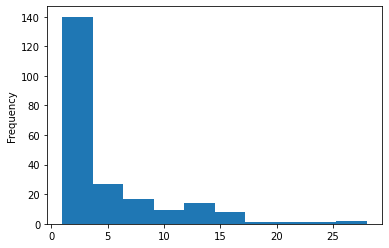

In [55]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len).value_counts().plot(kind='hist')

In [63]:
MAX_LENGTH = 150

In [64]:
def pad_tokens(tokens):
  if(len(tokens) >= MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens + [pad_token] * (MAX_LENGTH - len(tokens))

In [61]:
pad_tokens(tokenizer("Hello Aakkash"))

['hello', 'aakkash', '<pad>', '<pad>', '<pad>']

In [65]:
import torch

In [82]:
class JigsawDataset(Dataset):
    def __init__(self, df, is_test=False):
        self.df = df
        self.is_test = is_test

    def __getitem__(self, index):
        comment_text = self.df.comment_text.values[index]
        comment_tokens = pad_tokens(tokenizer(comment_text))
        input = torch.tensor(vocab.lookup_indices(comment_tokens))
        if self.is_test:
            target = torch.tensor([0,0,0,0,0,0]).float()
        else:
            target = torch.tensor(self.df[target_cols].values[index]).float()
        return input, target

    def __len__(self):
        return len(self.df)

In [83]:
raw_ds = JigsawDataset(raw_df)

In [84]:
raw_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [85]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [86]:
from torch.utils.data import random_split

In [87]:
VAL_SIZE = 0.25

In [89]:
train_ds,val_ds = random_split(raw_ds,[1-VAL_SIZE,VAL_SIZE])

In [90]:
len(raw_ds),len(train_ds),len(val_ds)

(159571, 119679, 39892)

In [91]:
test_ds = JigsawDataset(test_df,is_test=True)
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0, 1850,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
         1920,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Creating PyTorch DataLoaders

In [92]:
from torch.utils.data import DataLoader

In [93]:
BATCH_SIZE = 256

In [100]:
train_dl = DataLoader(train_ds,batch_size = BATCH_SIZE,shuffle=True,num_workers = 2,pin_memory = True)
val_dl = DataLoader(val_ds,batch_size = BATCH_SIZE*2,num_workers = 2,pin_memory = True)

In [101]:
test_dl = DataLoader(test_ds,batch_size = 2*BATCH_SIZE,num_workers = 8,pin_memory=True)

The difference with the Bag of words is that instead of converting into vectors by not maintaining the order, in this case we have maintained the order

# Build a Recurrent Neural Network


1. The bag of words model actually converts the given complete words into vectors by computing the frequency of each word in the vocabulary. 
RNN will first assign an index to the word according the vocabulary and then will convert each index of the word into vectors 

2. In bag of words, the order of words in lost while in the RNN the order is maintained

3. BOW actually works in a Neural Network in which initally a fixed number of input is given and is brought down to 6 depending on the number of features in the target column. While RNN works in the fact that initally an `nn.RNN` is placed as an layer in which the first word is given as the input with `h0` as hidden input and given an ouptut. The same layer is used with the next word in the sentence with hidden input `h1` and returns an output. So instead of converting the entire sentence into vectors, each word is converted into a vector which maintains the order

4. Also in the RNN, we always have an embedding layer which will convert the given word indices into vector and pass them into the nn.RNN layer. So before an RNN layer, we alwyas have an `embedding` layer. The word vector from the embedding layer is trained automatically by the network

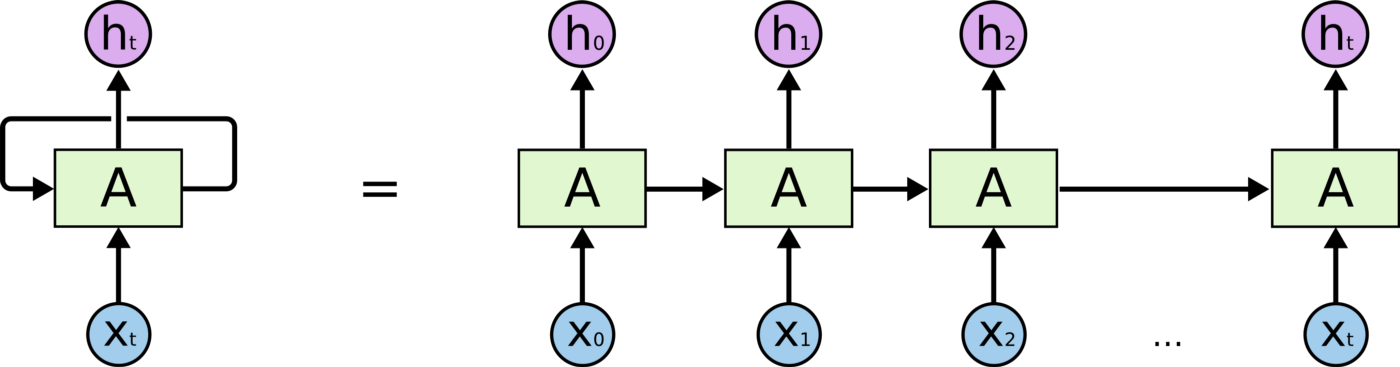

In [112]:
import torch.nn as nn
import torch.nn.functional as F

In [103]:
emb_layer = nn.Embedding(VOCAB_SIZE,256,1)

In [105]:
rnn_layer = nn.RNN(256,128,1,batch_first=True)

In [106]:
for batch in train_dl:
  bi,bt = batch
  print("IS:",bi.shape)
  print("TS:",bt.shape)

  emb_out = emb_layer(bi)
  print("ES:",emb_out.shape)

  rnn_out,hn = rnn_layer(emb_out)
  print("RS:",rnn_out.shape)
  print("HS:",hn.shape)
  break

IS: torch.Size([256, 150])
TS: torch.Size([256, 6])
ES: torch.Size([256, 150, 256])
RS: torch.Size([256, 150, 128])
HS: torch.Size([1, 256, 128])


PytorchLightning actually increases the speed and the performance of the model

In [108]:
!pip install pytorch_lightning --quiet

In [109]:
import pytorch_lightning as pl

Instead of actually using RNN, let's use the LSTM

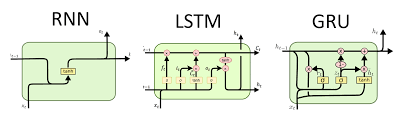

In [118]:
import numpy as np

In [126]:
class JigsawModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
        self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
        self.linear = nn.Linear(128, 6)
        self.learning_rate = 0.001

    def forward(self, x):
        out = self.emb(x)
        out, hn = self.lstm(out)
        out = F.relu(out[:,-1,:])# With this we are actually getting the final 150 vetors instead of actually passing the entire vectors
        out = self.linear(out)
        return out

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        return loss.item()

    def validation_epoch_end(self, validation_step_outputs):
        loss = np.mean(validation_step_outputs)
        print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, loss)) 

    def predict_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        return probs       

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [127]:
model = JigsawModel()

In [128]:
for batch in train_dl:
  bi,bt = batch
  print("IS:",bi.shape)
  print("TS:",bt.shape)

  out = model(bi)
  print("OS:",out.shape)

  probs = torch.sigmoid(out)
  loss = F.binary_cross_entropy(probs,bt)
  print("Loss:",loss)
  break

IS: torch.Size([256, 150])
TS: torch.Size([256, 6])
OS: torch.Size([256, 6])
Loss: tensor(0.6854, grad_fn=<BinaryCrossEntropyBackward0>)


## Train and Evaluate the model

We will train the model with the PyTorch Lightning trainer which automates lot of manual training process

In [129]:
trainer = pl.Trainer(max_epochs = 3,accelerator='gpu',auto_lr_find = True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [130]:
trainer.tune(model,train_dl)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00478630092322638
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_9fbe7cf3-089e-485a-9c57-dc30b11154cc.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_9fbe7cf3-089e-485a-9c57-dc30b11154cc.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7fa248f6b700>}

In [131]:
model.learning_rate 

0.00478630092322638

In [132]:
trainer.fit(model,train_dl,val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 512 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
710 K     Trainable params
0         Non-trainable params
710 K     Total params
2.842     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.685457 


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.064970 


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.061870 


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.061021 


# Make Predictions

In [133]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [134]:
for batch in train_dl:
  bi,bt = batch
  print("IS:",bi.shape)
  print("TS:",bt.shape)
  break

IS: torch.Size([256, 150])
TS: torch.Size([256, 6])


In [135]:
test_preds = trainer.predict(model,test_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Predicting: 468it [00:00, ?it/s]

In [136]:
test_preds = torch.cat(test_preds)

In [137]:
test_preds.shape

torch.Size([153164, 6])

In [139]:
test_preds

tensor([[9.8732e-01, 2.5441e-01, 8.8980e-01, 1.9598e-02, 8.3290e-01, 8.4183e-02],
        [1.6070e-02, 8.2731e-05, 2.1062e-03, 1.7018e-04, 2.8473e-03, 2.4692e-04],
        [5.1050e-03, 6.5710e-05, 1.0907e-03, 2.2357e-04, 8.0529e-04, 1.2178e-04],
        ...,
        [1.4960e-02, 1.3100e-04, 2.5699e-03, 1.2386e-04, 3.1357e-03, 3.2978e-04],
        [1.4891e-02, 1.0329e-04, 2.0915e-03, 1.7928e-04, 2.7448e-03, 3.5031e-04],
        [8.7568e-01, 5.3731e-02, 4.6806e-01, 1.2894e-02, 4.7663e-01, 4.5581e-02]])

In [157]:
test_probs = torch.sigmoid(test_preds)

In [138]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [158]:
sub_df[target_cols] = test_probs.detach().cpu().numpy()

In [159]:
sub_df 

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.728558,0.563263,0.708848,0.504899,0.696969,0.521033
1,0000247867823ef7,0.504017,0.500021,0.500527,0.500043,0.500712,0.500062
2,00013b17ad220c46,0.501276,0.500016,0.500273,0.500056,0.500201,0.500030
3,00017563c3f7919a,0.500878,0.500008,0.500194,0.500034,0.500186,0.500023
4,00017695ad8997eb,0.503497,0.500039,0.500699,0.500051,0.500610,0.500050
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.503677,0.500026,0.500603,0.500044,0.500607,0.500093
153160,fffd7a9a6eb32c16,0.506871,0.500042,0.500859,0.500129,0.501054,0.500127
153161,fffda9e8d6fafa9e,0.503740,0.500033,0.500642,0.500031,0.500784,0.500082
153162,fffe8f1340a79fc2,0.503723,0.500026,0.500523,0.500045,0.500686,0.500088


In [161]:
sub_df.to_csv('new_submission.csv',index=None)

In [162]:
!head submission.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.728558,0.5632625,0.7088479,0.5048994,0.69696873,0.5210332
0000247867823ef7,0.50401735,0.5000207,0.50052655,0.50004256,0.5007118,0.50006175
00013b17ad220c46,0.50127625,0.50001645,0.50027263,0.5000559,0.5002013,0.50003046
00017563c3f7919a,0.5008776,0.50000817,0.5001936,0.5000339,0.50018626,0.5000227
00017695ad8997eb,0.5034975,0.5000393,0.5006989,0.50005126,0.5006103,0.5000496
0001ea8717f6de06,0.50097525,0.5000102,0.5002149,0.50005275,0.50014365,0.5000251
00024115d4cbde0f,0.5029313,0.5000138,0.50048023,0.50005794,0.5005074,0.5000435
000247e83dcc1211,0.5532686,0.5004593,0.50971204,0.5005126,0.5103323,0.50105083
00025358d4737918,0.5503142,0.50033593,0.50375307,0.5007399,0.5068253,0.5011486


In [153]:
sample_df = raw_df.sample(10)

In [154]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
62755,a7e718688f610f43,"Hi, thanks for the prompt reply, ideally we wo...",0,0,0,0,0,0
30998,525804f5914fa875,Fred Carama \n\nYou voted to delete this artic...,0,0,0,0,0,0
58765,9d5e694ea225d63d,Your typical semi-religious or non-religious ...,0,0,0,0,0,0
444,012158a8030c1bd0,"Men's ranking Figure: While nice to look at, m...",0,0,0,0,0,0
151764,827fcf2b4c598191,"""\nWas the NYT consistently used for years as ...",0,0,0,0,0,0
69066,b8c57b40eb76460e,|.]]Please share your thoughts on the matter a...,0,0,0,0,0,0
118410,78ae445fba2e55cf,"""= Traffic drives improvement ===\n\nThe outli...",0,0,0,0,0,0
129268,b366b590c19f9dea,"""\n\nDennis, I'd really love to hear an answer...",0,0,0,0,0,0
45388,795fce3639951b2a,Lostpedia further reading \n\nYou seem to have...,0,0,0,0,0,0
11049,1d304402e5bdf46c,"""\n\nArgh, you assehole. Not only did you give...",1,0,1,0,1,0


In [155]:
sample_ds = JigsawDataset(sample_df)

In [156]:
sample_dl = DataLoader(sample_ds,batch_size=10)

In [163]:
sample_preds = trainer.predict(model,sample_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [164]:
sample_probs = torch.sigmoid(sample_preds[0])

In [173]:
(sample_probs>0.55).int()

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0]], dtype=torch.int32)

In [174]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
62755,a7e718688f610f43,"Hi, thanks for the prompt reply, ideally we wo...",0,0,0,0,0,0
30998,525804f5914fa875,Fred Carama \n\nYou voted to delete this artic...,0,0,0,0,0,0
58765,9d5e694ea225d63d,Your typical semi-religious or non-religious ...,0,0,0,0,0,0
444,012158a8030c1bd0,"Men's ranking Figure: While nice to look at, m...",0,0,0,0,0,0
151764,827fcf2b4c598191,"""\nWas the NYT consistently used for years as ...",0,0,0,0,0,0
69066,b8c57b40eb76460e,|.]]Please share your thoughts on the matter a...,0,0,0,0,0,0
118410,78ae445fba2e55cf,"""= Traffic drives improvement ===\n\nThe outli...",0,0,0,0,0,0
129268,b366b590c19f9dea,"""\n\nDennis, I'd really love to hear an answer...",0,0,0,0,0,0
45388,795fce3639951b2a,Lostpedia further reading \n\nYou seem to have...,0,0,0,0,0,0
11049,1d304402e5bdf46c,"""\n\nArgh, you assehole. Not only did you give...",1,0,1,0,1,0
